In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

# Compressed Sparse Row matrix https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.sparse import csr_matrix

# Svd for sparse matrix https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.svds.html
from scipy.sparse.linalg import svds

# Sqrtm for matrix square root https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.sqrtm.html
from scipy.linalg import sqrtm

In [2]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv("ml-latest-small/movies.csv")
user_movie_matrix = pd.merge(ratings, movies, on='movieId')
user_movie_matrix_pivot = user_movie_matrix.pivot(index='userId', columns='movieId', values='rating').fillna(0)
print(user_movie_matrix_pivot.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [3]:
genres = []
for i in movies["genres"].unique():
    for k in i.split("|"):
        if k not in genres:
            genres.append(k)

print("lenght:", len(genres))
for item in genres:
    print(item)

lenght: 20
Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
Mystery
Sci-Fi
War
Musical
Documentary
IMAX
Western
Film-Noir
(no genres listed)


In [4]:
# Sparse matrix
sparse_user_movie_matrix = csr_matrix(user_movie_matrix_pivot.values)
print(sparse_user_movie_matrix)

  (0, 0)	4.0
  (0, 2)	4.0
  (0, 5)	4.0
  (0, 43)	5.0
  (0, 46)	5.0
  (0, 62)	3.0
  (0, 89)	5.0
  (0, 97)	4.0
  (0, 124)	5.0
  (0, 130)	5.0
  (0, 136)	5.0
  (0, 184)	5.0
  (0, 190)	3.0
  (0, 197)	5.0
  (0, 201)	4.0
  (0, 224)	5.0
  (0, 257)	3.0
  (0, 275)	3.0
  (0, 291)	5.0
  (0, 307)	4.0
  (0, 314)	4.0
  (0, 320)	5.0
  (0, 325)	4.0
  (0, 367)	3.0
  (0, 384)	4.0
  :	:
  (609, 9238)	5.0
  (609, 9246)	4.5
  (609, 9256)	4.0
  (609, 9268)	5.0
  (609, 9274)	3.5
  (609, 9279)	3.5
  (609, 9282)	3.0
  (609, 9288)	3.0
  (609, 9304)	3.0
  (609, 9307)	2.5
  (609, 9312)	4.5
  (609, 9317)	3.0
  (609, 9324)	3.0
  (609, 9339)	4.0
  (609, 9341)	4.0
  (609, 9348)	3.5
  (609, 9371)	3.5
  (609, 9372)	3.5
  (609, 9374)	5.0
  (609, 9415)	4.0
  (609, 9416)	4.0
  (609, 9443)	5.0
  (609, 9444)	5.0
  (609, 9445)	5.0
  (609, 9485)	3.0


In [5]:
# SVD decomposition
latent_features = 20
U, sigma, Vt = svds(sparse_user_movie_matrix, k=latent_features)
print('U.shape', U.shape)
print('sigma.shape', sigma.shape)
print('Vt.shape', Vt.shape)

sigma = np.diag(sigma)
root_sigma = sqrtm(sigma)
print('root_sigma.shape', root_sigma.shape)
U = np.dot(U, root_sigma)
Vt = np.dot(root_sigma, Vt)

U.shape (610, 20)
sigma.shape (20,)
Vt.shape (20, 9724)
root_sigma.shape (20, 20)


In [19]:
confront_movie = True
confront_user = True

utente = 8
film = 1

user_dict = {
    "Adventure": 0,
    "Animation": 0,
    "Children": 0,
    "Comedy": 0,
    'Fantasy': 0,
    'Romance': 0,
    'Drama': 0,
    'Action': 0,
    'Crime': 0,
    'Thriller': 0,
    'Horror': 0,
    'Mystery': 0,
    'Sci-Fi': 0,
    'War': 0,
    'Musical': 0,
    'Documentary': 0,
    'IMAX': 0,
    'Western': 0,
    'Film-Noir': 0,
    '(no genres listed)': 0,
}
movie_dict = {
    "Adventure": 0,
    "Animation": 0,
    "Children": 0,
    "Comedy": 0,
    'Fantasy': 0,
    'Romance': 0,
    'Drama': 0,
    'Action': 0,
    'Crime': 0,
    'Thriller': 0,
    'Horror': 0,
    'Mystery': 0,
    'Sci-Fi': 0,
    'War': 0,
    'Musical': 0,
    'Documentary': 0,
    'IMAX': 0,
    'Western': 0,
    'Film-Noir': 0,
    '(no genres listed)': 0,
}

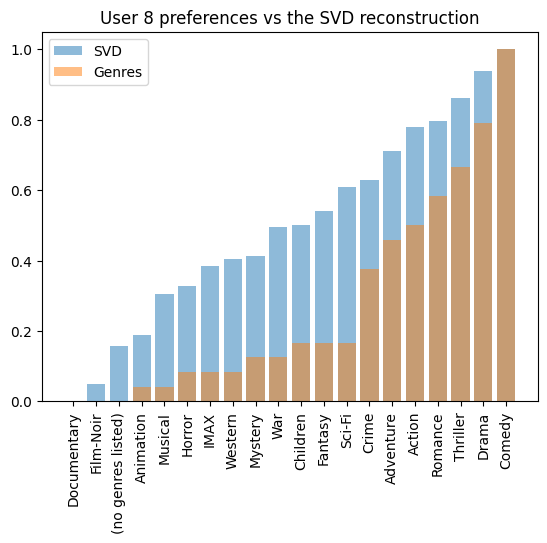

In [21]:
if confront_user:
    c = user_movie_matrix[user_movie_matrix["userId"] == utente].sort_values("rating", ascending=False)

    # weight the genres by the rating
    for index, row in c.iterrows():
        genres = row["genres"].split("|")
        for genre in genres:
            # dict[genre] += row["rating"]
            user_dict[genre] += 1

    # order the dict by value
    ordered_user_dict = {}

    for key, value in sorted(user_dict.items(), key=lambda x: x[1], reverse=False):
        # print(key, value)
        ordered_user_dict[key] = value

    # Normalize the values in the dict
    for key in ordered_user_dict:
        ordered_user_dict[key] /= max(ordered_user_dict.values())
    
    fig, ax = plt.subplots()

    # barplot of the values in the dict in order of value
    U_scaled = U[utente] - U[utente].min()
    U_scaled /= U_scaled.max()
    U_scaled = np.sort(U_scaled)

    # Plot the first bar plot
    ax.bar(range(latent_features), U_scaled, alpha=0.5, label='SVD')

    # Plot the second bar plot
    ax.bar(range(len(user_dict)), ordered_user_dict.values(), align='center', alpha=0.5, label='Genres')

    # Set the x-ticks and labels for the second bar plot
    ax.set_xticks(range(len(user_dict)))
    ax.set_xticklabels(ordered_user_dict.keys(), rotation='vertical')

    # Add legend
    ax.legend()

    plt.title('User ' + str(utente) + ' preferences vs the SVD reconstruction')

    # Show the plot
    plt.show()

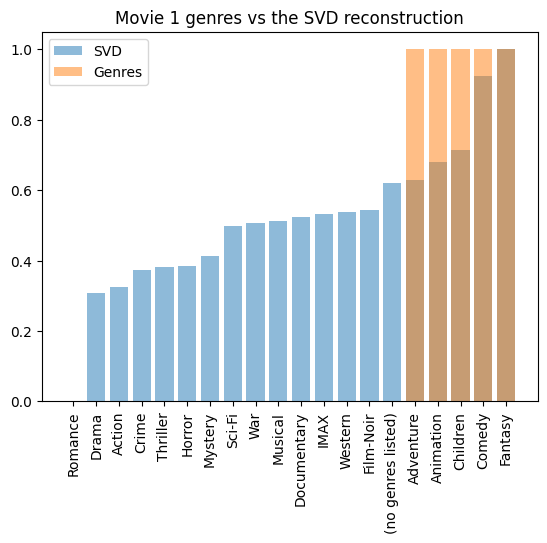

In [22]:
if confront_movie:
    d = movies[["movieId", "genres"]]
    d = d[d["movieId"] == film]
    # print(d)

    for index, row in d.iterrows():
        genres = row["genres"].split("|")
        for genre in genres:
            movie_dict[genre] = 1

    ordered_movie_dict = {}

    for key, value in sorted(movie_dict.items(), key=lambda x: x[1], reverse=False):
        # print(key, value)
        ordered_movie_dict[key] = value

    fig, ax = plt.subplots()

    # barplot of the values in the dict in order of value
    Vt_scaled = Vt[:, film] - Vt[:, film].min()
    Vt_scaled /= Vt_scaled.max()
    Vt_scaled = np.sort(Vt_scaled)

    # Plot the first bar plot
    ax.bar(range(latent_features), Vt_scaled, alpha=0.5, label='SVD')
    
    # Plot the second bar plot
    ax.bar(range(len(ordered_movie_dict)), ordered_movie_dict.values(), align='center', alpha=0.5, label='Genres')

    # Set the x-ticks and labels for the second bar plot
    ax.set_xticks(range(len(ordered_movie_dict)))
    ax.set_xticklabels(ordered_movie_dict.keys(), rotation='vertical')

    # Add legend
    ax.legend()

    plt.title('Movie ' + str(film) + ' genres vs the SVD reconstruction')

    # Show the plot
    plt.show()
